# Logistic Regreesion

Logistic regression Is a supervised machine learning algorithm Use it for classification, Predicting The probability of a categorical outcome (like yes/no, spam/not spam) By fitting data into sigmoid(S-shaped curve, Which maps linear combinations features to probabilities between 0 and 1.

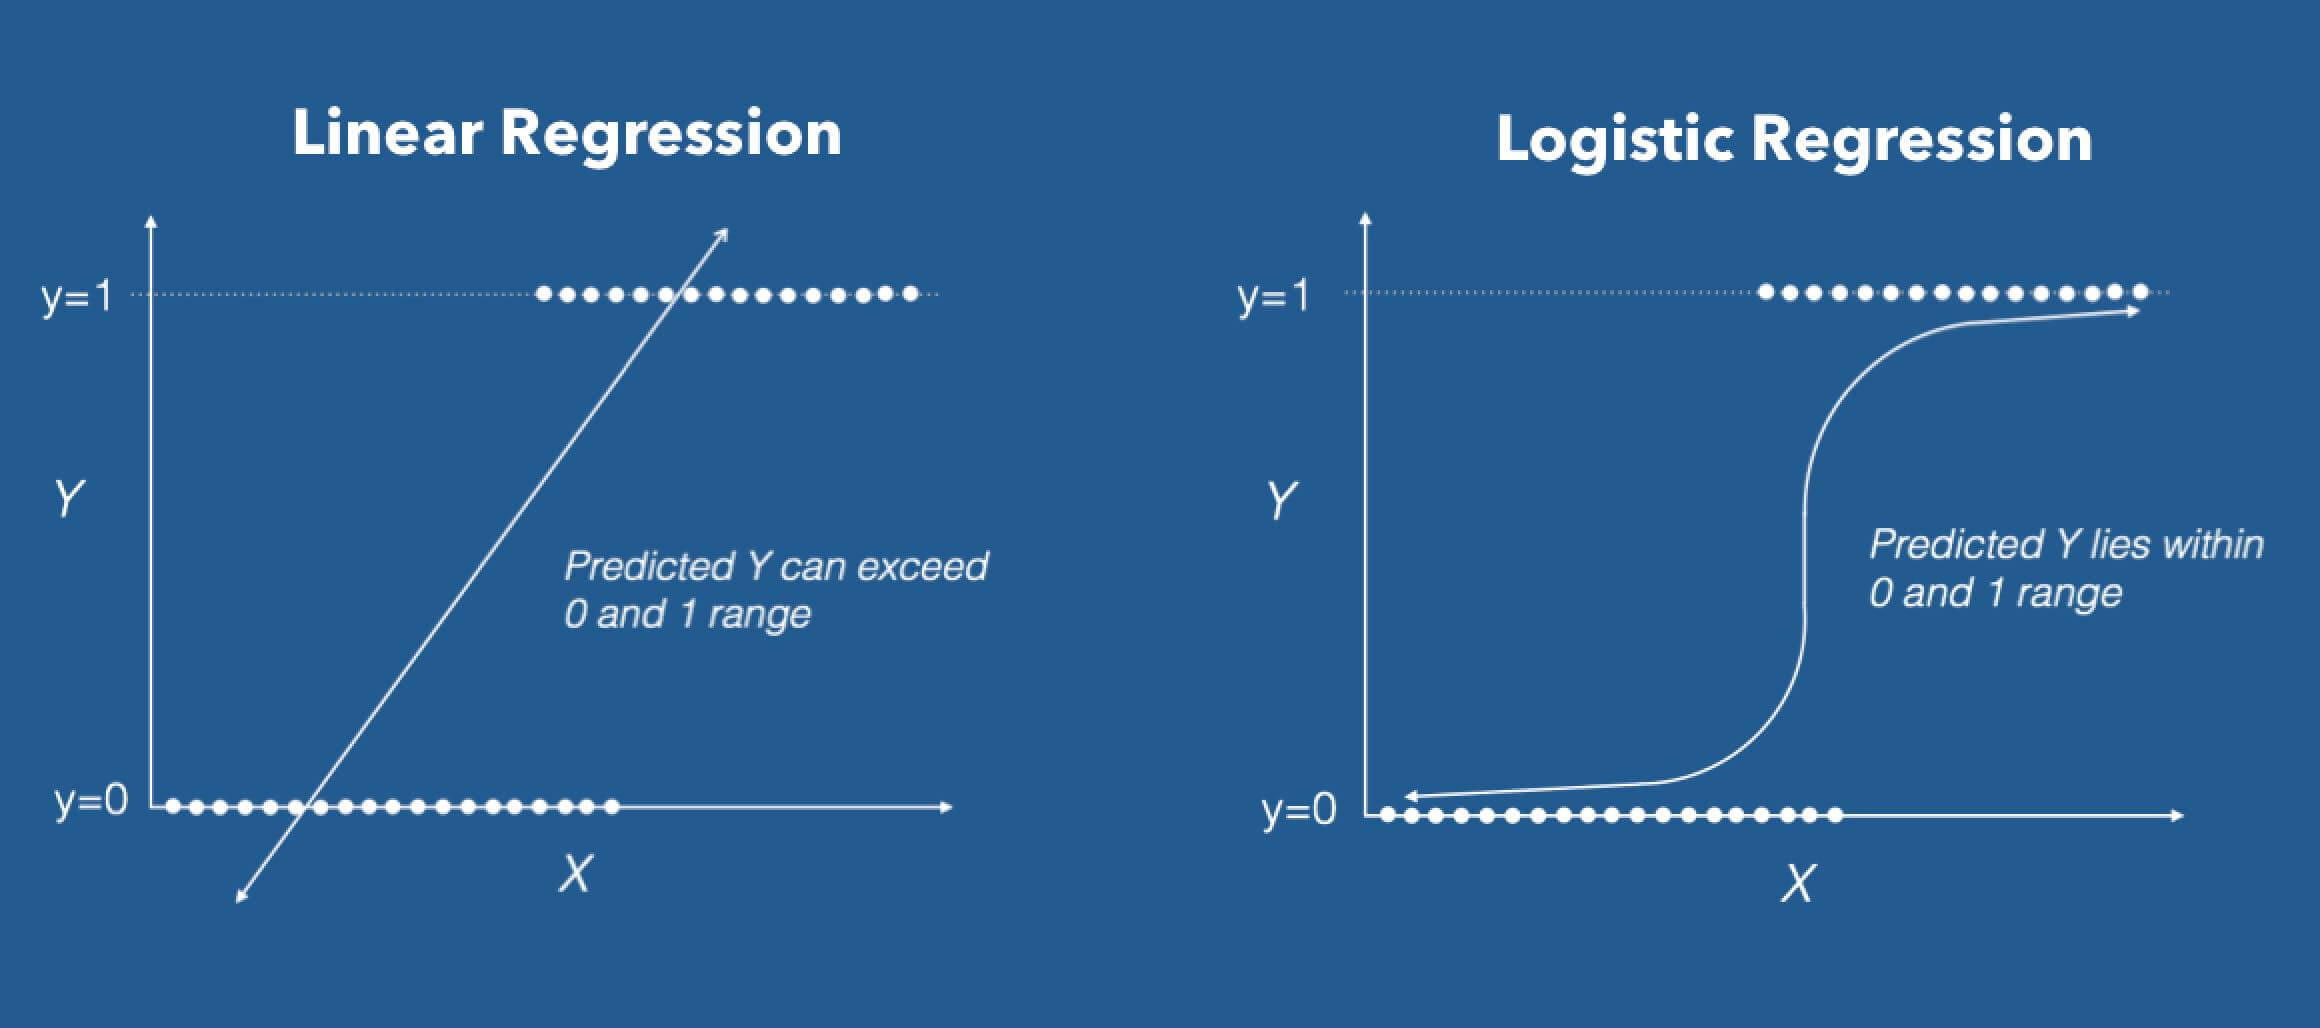

### Linear Regression Formula

$$
\begin{aligned}
y &= mx + c \\
y &= \beta_0 + \beta_1 x
\end{aligned}
$$

### Dataset

| Student | Study Hours (x) | Result (y) |
|--------|----------------|------------|
| A      | 1              | 0          |
| B      | 2              | 0          |
| C      | 1              | 0          |
| D      | 4              | 1          |
| E      | 5              | 1          |

### 🔷 Step 1:

Output has only only 0 or 1.

### 🔷 Step 2

As the number of study hours increases, the probability of passing increases.


### 🔷 Step 3: Model Equation (Logistic Regression)

First compute the linear combination:

$$
\begin{aligned}
z &= w_0 + w_1 x
\end{aligned}
$$

Then apply the sigmoid function to obtain probability:

$$
\begin{aligned}
P(y=1 \mid x) &= \frac{1}{1 + e^{-z}}
\end{aligned}
$$


### 🔷 Step 4: Decision Rule

$$
\begin{aligned}
\text{If } P(y=1) &\le 0.5 \Rightarrow \text{Fail } (0) \\
\text{If } P(y=1) &> 0.5 \Rightarrow \text{Pass } (1)
\end{aligned}
$$


### 🔷 Step 5: Row-wise Prediction (Initialization)

Assume initial weights:

$$
\begin{aligned}
w_0 &= 0 \\
w_1 &= 0
\end{aligned}
$$


#### Student A ( \(x = 1\) )

$$
\begin{aligned}
z &= 0 + 0(1) = 0 \\
P(1) &= \frac{1}{1 + e^{0}} = \frac{1}{2} = 0.5 \approx 0
\end{aligned}
$$


#### Student B ( \(x = 2\) )

$$
\begin{aligned}
z &= 0 + 0(2) = 0 \\
P(1) &= \frac{1}{1 + e^{0}} = 0.5
\end{aligned}
$$


#### Updated Weights (Assumption)

$$
\begin{aligned}
w_0 &= -6 \\
w_1 &= 2
\end{aligned}
$$


#### Example Prediction

$$
\begin{aligned}
z &= -6 + 2(1) = -4 \\
P(1) &= \frac{1}{1 + e^{4}}
\end{aligned}
$$

#### Student B ( \(x = 2\) )

$$
\begin{aligned}
z &= -6 + 2(2) \\
  &= -6 + 4 \\
  &= -2
\end{aligned}
$$

$$
\begin{aligned}
P(2) &= \frac{1}{1 + e^{2}} \\
     &\approx 0.11 \approx 0
\end{aligned}
$$


#### Student C ( \(x = 3\) )

$$
\begin{aligned}
z &= -6 + 2(3) \\
  &= 0
\end{aligned}
$$

$$
\begin{aligned}
P(3) &= \frac{1}{1 + e^{0}} \\
     &= \frac{1}{2} = 0.5 \approx 0
\end{aligned}
$$


#### Student D ( \(x = 4\) )

$$
\begin{aligned}
z &= -6 + 2(4) \\
  &= 2
\end{aligned}
$$

$$
\begin{aligned}
P(4) &= \frac{1}{1 + e^{-2}} \\
     &\approx 0.88 \approx 1
\end{aligned}
$$


#### Sigmoid Function Behavior

$$
\begin{aligned}
P(y=1 \mid x) &= \frac{1}{1 + e^{-(w_0 + w_1 x)}}
\end{aligned}
$$

- As \(x\) increases, \(z = w_0 + w_1 x\) increases  
- Probability smoothly transitions from **0 → 1**
- Decision boundary occurs at \(P = 0.5\)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.DataFrame({
"hours_studied": [1, 2, 3, 4, 5],
"result": [0, 0, 0, 1, 1]
})

In [3]:
X = data[["hours_studied"]]
y = data["result"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion_matrix:
 [[1]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [8]:
hours = [[6]]
prediction = model.predict(hours)
probability = model.predict_proba(hours)

print("Prediction:", prediction)
print("Probability:", probability)

Prediction: [1]
Probability: [[0.07953257 0.92046743]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
print("w0 (intercept):", model.intercept_)
print("w1 (coefficient):", model.coef_)

w0 (intercept): [-3.06082054]
w1 (coefficient): [[0.91825592]]


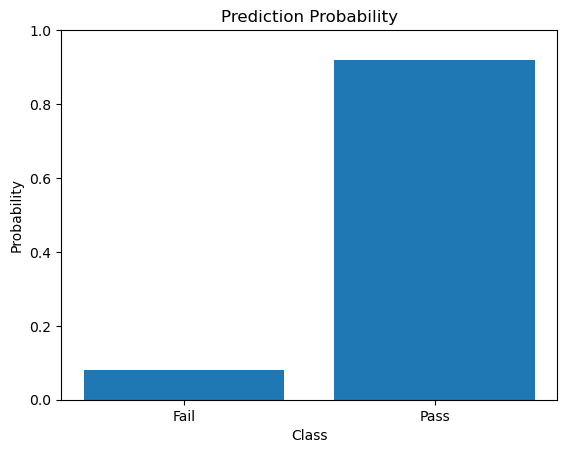

In [11]:
probs = probability[0]
classes = ['Fail', 'Pass']

plt.figure()
plt.bar(classes, probs)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title("Prediction Probability")
plt.ylim(0, 1)
plt.show()